In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('playstore-analysis.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
df.shape

(10841, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Task 1 Data Clean Up - Missing Value Treatment
#### a. Drop records where rating is missing since rating is our target/study variable

In [5]:
df.dropna(subset=['Rating'],inplace=True)
df.Rating.isnull().sum()

0

#### b. Check the null values for the Android Ver column.
#### i. Are all 3 records having the same problem?

In [6]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### ii. Drop the 3rd record i.e. record for “Life Made WIFI

In [7]:
df.drop([10472], inplace= True)

In [8]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [9]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace = True)

#### c. Current ver – replace with most common value

In [10]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace = True)

## Task 2 Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?
#### Ans:- Reviews and Install need to be brought to numerical type.

#### b. Price variable – remove $ sign and convert to float

In [11]:
val = []
for i in df['Price']:
    if i[0] == '$':
        val.append(i[1:])
    else:
        val.append(i)

In [12]:
df.drop('Price',axis= 'columns', inplace= True)

In [13]:
df['Price'] = val
df['Price'] = df.Price.astype('float')

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [14]:
inn = []
for i in df['Installs']:
    inn.append(i.replace(',','').replace('+','').strip())

In [15]:
df.Installs = inn
df['Installs'] = df['Installs'].astype("int")

#### d. Convert all other identified columns to numeric

In [16]:
df['Reviews'] = df['Reviews'].astype('int')

## Task 3. Sanity checks – check for the following and handle accordingly
#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store
#### i. Are there any such records? Drop if so.

In [17]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price


#### Ans: Rating does not have any record less than 1 or greater than 5

#### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.

In [18]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,0.00
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,2.49
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,1.49
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,0.00
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,0.00
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,Teen,Social,"July 23, 2018",1.0,4.0 and up,0.00
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,0.99


###### There are seven recodes where number of reviews are greater than number of installs

In [19]:
# We will find the index number of the records are frop them
index_number = df[df['Reviews'] > df['Installs']].index

In [20]:
index_number

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [21]:
df.drop(index_number,inplace= True)

In [22]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price


## Task 4. Identify and handle outliers
#### a. Price column
#### i. Make suitable plot to identify outliers in price

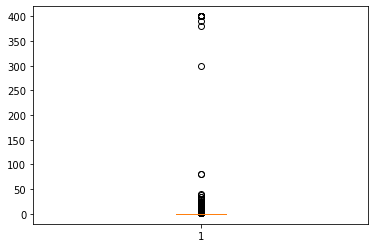

In [23]:
# We use box plot to find out the outliers.
plt.boxplot(df.Price, data = df)
plt.show()

#### ii. Do you expect apps on the play store to cost $200? Check out these cases.

Ans: Yes, From the box plot we can clearly see thar there aare some app that cast above $200

In [24]:
df[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,400.00
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,399.99
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,399.99
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,299.99
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,399.99
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,379.99
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,399.99
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,399.99


#### iv. Limit data to records with price < $30

In [25]:
# we need to perform (iv) first

In [26]:
limit = df.loc[df['Price'] > 30].index
limit

Int64Index([2253, 2301, 2365, 2402, 2414, 4197, 4362, 4367, 5351, 5354, 5355,
            5356, 5357, 5358, 5359, 5360, 5362, 5364, 5366, 5369, 5373],
           dtype='int64')

In [27]:
df.drop(limit,inplace= True)

In [28]:
df.loc[df.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price


In [29]:
# nOE NO RECORD IS GREAER THAN 30

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

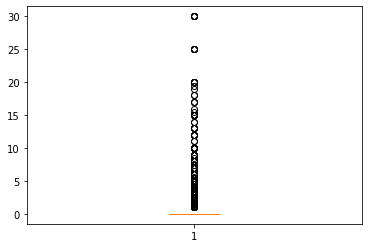

In [30]:
plt.boxplot(df.Price,data= df)
plt.show()

#### b. Reviews column
#### i. Make suitable plot

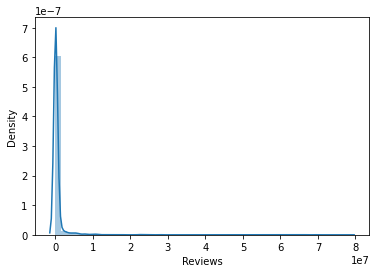

In [31]:
sns.distplot(df.Reviews)
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [32]:
limit_1 = df[df['Reviews']> 1000000].index
limit_1

Int64Index([  139,   152,   189,   194,   201,   293,   297,   335,   336,
              338,
            ...
             9843,  9851,  9853,  9860, 10186, 10190, 10200, 10327, 10636,
            10707],
           dtype='int64', length=704)

In [33]:
df.drop(limit_1, inplace=True)

In [34]:
drop_val = limit_1.value_counts().sum()
print(drop_val, " recodes has been dropped")

704  recodes has been dropped


#### c. Installs
#### i. What is the 95th percentile of the installs?

In [35]:
per = df.Installs.quantile(0.95)
print(per, " is 95th percentile of Installs")

10000000.0  is 95th percentile of Installs


In [36]:
np.percentile(df.Installs,95)

10000000.0

#### ii.Drop records having a value more than the 95th percentile

In [37]:
ind_num = df[df.Installs > per].index
ind_num

Int64Index([    3,   143,   188,   192,   225,   292,   346,   348,   369,
              389,
            ...
             9844, 10010, 10196, 10253, 10378, 10408, 10429, 10513, 10549,
            10647],
           dtype='int64', length=199)

In [38]:
df.drop(ind_num,inplace= True)

In [39]:
num = ind_num.value_counts().sum()
print(num, "records of Installs greater than 95th percentile has been dropped")

199 records of Installs greater than 95th percentile has been dropped


## Data analysis to answer business questions
## Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a. How do you explain this?

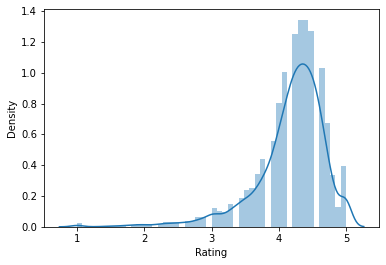

In [40]:
sns.distplot(df.Rating)
plt.show()

In [41]:
mean = df.Rating.mean()
mean

4.170800237107298

In [42]:
median = df.Rating.median()
median

4.3

In [43]:
# We have to see the skewness of the distribution
print('The Skewness of the Distribution of the rating ',df.Rating.skew())
print('The Median {} of the distribution is greater than Mean {:.3f} of the distribution'.format(median,mean))

The Skewness of the Distribution of the rating  -1.7434270330647985
The Median 4.3 of the distribution is greater than Mean 4.171 of the distribution


###### From the distribution plot we can clearly understand that it is negative skewned

#### b. What is the implication of this on your analysis?

In [44]:
mode = df["Rating"].mode()
mode

0    4.3
dtype: float64

###### Here, Mode >= Median > Mean and the distribution rating is Negative Skewned. Therefore, we can confirm that the distribution rating is more skewned towards Lower Value.

## Task 6. What are the top Content Rating values?
#### a. Are there any values with very few records?

In [45]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [46]:
# There are two Content Rating that have the lowest record i.e. Adults only 18+ '3' and Unrated '1'.

#### b. If yes, drop those as they won’t help in the analysis

In [47]:
temp_3 = df[df["Content Rating"] == 'Adults only 18+'].index
temp_4 = df[df['Content Rating'] == 'Unrated'].index

In [48]:
df.drop(temp_3,inplace=True)
df.drop(temp_4, inplace = True)

In [49]:
print('The top Content Rating are: ')
print(df['Content Rating'].value_counts())

The top Content Rating are: 
Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64


## Task 7. Effect of size on rating
#### a. Make a joinplot to understand the effect of size on rating

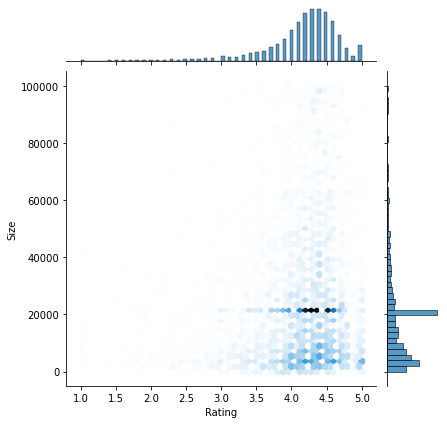

In [50]:
sns.jointplot(x = df.Rating , y = df.Size, kind = "hex")
plt.show()

#### b. Do you see any patterns?
Ans:  Yes, we can clearly observe the pattern between Size and Rating. Size and Rating are Correlated with each other.

#### c. How do you explain the pattern?
Ans: Normally as the rating increase the Size also increase. But that's not always the case, we can see that for higher rating there is a constant size. SO we can conclude that there is a positive correlation.

## Task 8. Effect of price on rating
#### a. Make a jointplot (with regression line)

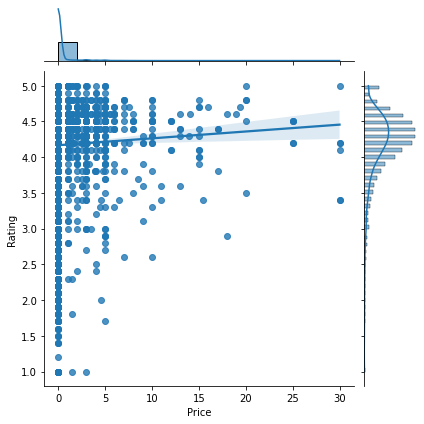

In [51]:
sns.jointplot(x = df.Price, y = df.Rating,kind = 'reg')
plt.show()

#### b. What pattern do you see?
Ans. We can see a pattern that as the price increase the rating is almost constantly greater than 4.

## c. How do you explain the pattern?
Ans. As the price increase the rating is almost constantly greater than 4. Hence, it can be said that there is slight positive correlation between Rating and Price.

#### d. Replot the data, this time with only records with price > 0

In [52]:
df_new = df[df['Price'] > 0]

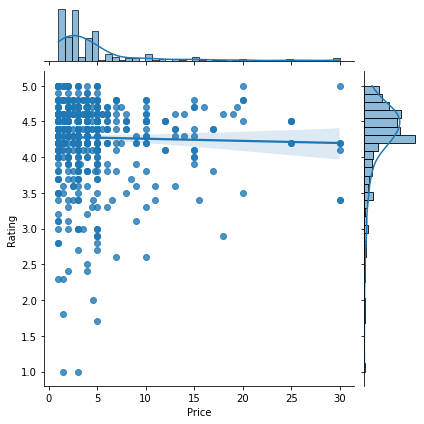

In [53]:
sns.jointplot(x = df_new.Price, y = df_new.Rating,kind = 'reg')
plt.show()

#### e. Does the pattern change?
Ans. Yes, we can observe the new pattern after applying limit on record with price > 0. There is a Very Week Negative Correlation between Price and Rating.

In [54]:
df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


#### f. What is your overall inference on the effect of price on the rating.
Ans. Normally when the Price increase there have no significance on Higher Ratings. For High Price the Rating is high, almost constant greate than 4.

## Task 9. Look at all the numeric interactions together -
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

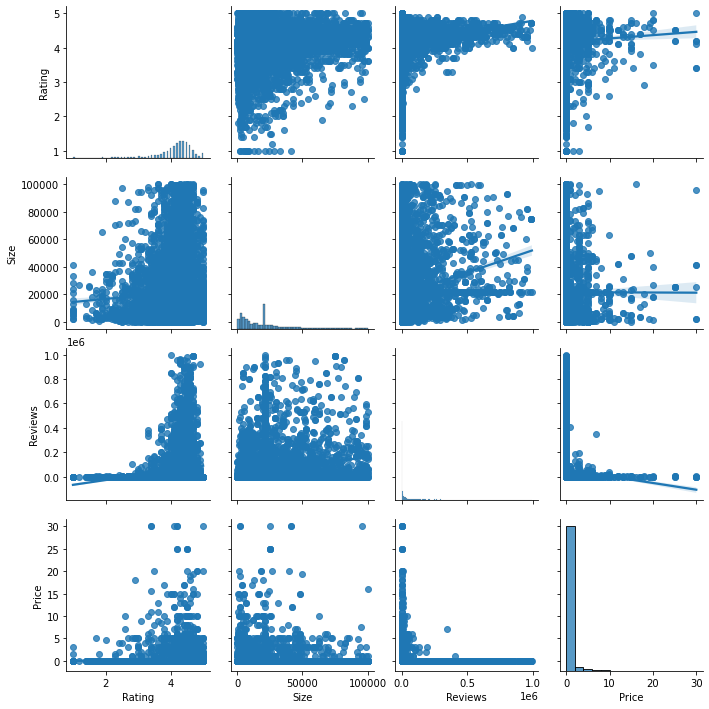

In [55]:
sns.pairplot(df, vars = ["Rating","Size","Reviews","Price"],kind= 'reg')
plt.show()

## Task 10. Rating vs. content rating
#### a. Make a bar plot displaying the rating for each content rating

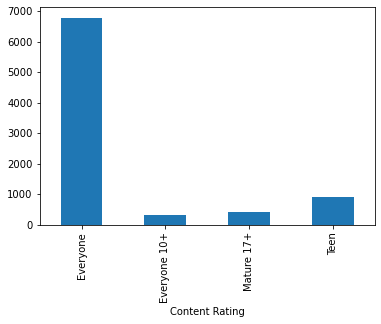

In [56]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar()
plt.show()

#### b. Which metric would you use? Mean? Median? Some other quantile?

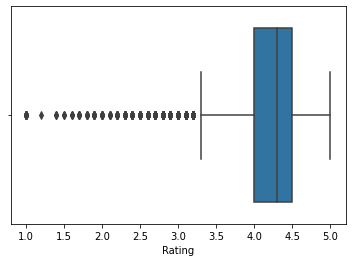

In [57]:
sns.boxplot(df.Rating)
plt.show()

Ans. Here we will use Median as it contain outliers. Median will be the best Central Tendency.

#### c. Choose the right metric and plot

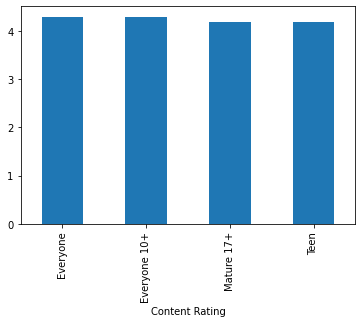

In [58]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
#### a. Create 5 buckets (20% records in each) based on Size

In [59]:
bins = [0,20000, 40000, 60000, 80000, 100000]
df['Bucket'] = pd.cut(df.Size,bins = bins,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [60]:
pd.pivot_table(df,values='Rating',index='Bucket',columns='Category')

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Bucket,,,,,,,,,,,,,,,,,,,,,
0-20k,4.306667,4.074359,4.332,4.314414,4.074176,4.005263,4.063576,3.883929,4.355072,4.162069,...,4.287446,4.062500,4.088398,4.216379,4.247967,4.217742,4.030983,4.124390,4.002564,4.223077
20k-40k,4.493750,4.376923,4.200,4.461224,4.204301,4.462500,4.160494,4.086957,4.360656,4.050769,...,4.426087,4.262857,4.351136,4.242857,4.180000,4.212121,4.036066,4.106593,4.035556,4.250000
40k-60k,NaN,4.140000,4.200,4.016667,4.046667,NaN,4.280000,3.930000,4.470000,4.128571,...,4.460000,4.306667,4.054545,4.414286,4.200000,4.135000,3.133333,3.930000,4.037500,4.050000
60k-80k,NaN,4.400000,NaN,4.666667,5.000000,NaN,4.100000,4.500000,4.580000,4.233333,...,4.825000,4.400000,4.550000,NaN,4.654545,4.261538,2.766667,3.733333,3.700000,NaN
80k-100k,NaN,4.050000,NaN,3.650000,4.500000,NaN,NaN,NaN,4.300000,NaN,...,4.200000,4.400000,NaN,3.300000,3.900000,4.316667,4.000000,4.333333,4.550000,NaN


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [61]:
CR =pd.pivot_table(df, values='Rating', index='Bucket', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
CR

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this
####        i. Annotated

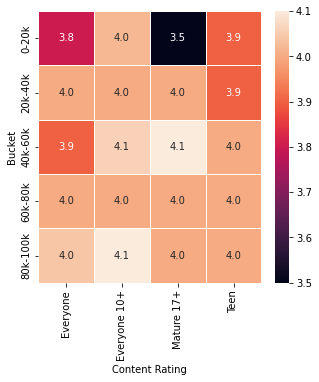

In [63]:
plt.subplots(figsize=(5, 5))
sns.heatmap(CR, annot=True, linewidths=.5, fmt='.1f')
plt.show()

####        ii. Greens color map

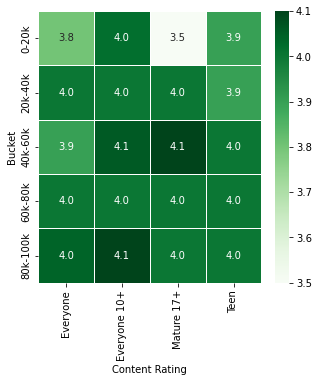

In [64]:
plt.subplots(figsize=(5, 5))
sns.heatmap(CR, annot=True, linewidths=.5, cmap='Greens',fmt='.1f')
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

After analysing the data, we can say that not all lighter apps are preferred in all category.Because apps with size
40k-60k and 80k-100k have got the highest rating in all categories. So we can say that Heavier app are preferred in all category.